<a href="https://colab.research.google.com/github/vidhirawat10/CodSoft/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CodSoft Internship

Task 3 - IRIS Flower Classification

Author - Vidhi Rawat

BATCH - JULY BATCH A62

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
iris_data = pd.read_csv('IRIS.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Preprocessing the dataset**

In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Exploratory Data Analysis**

<Axes: >

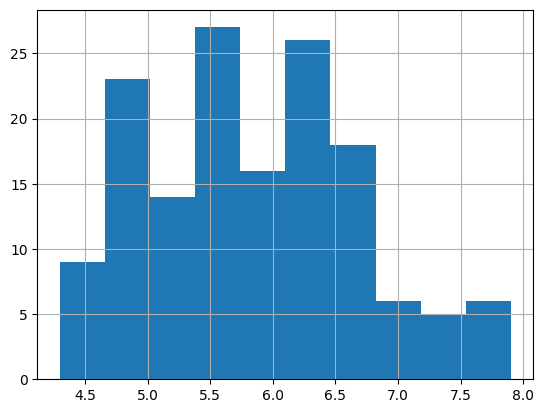

In [8]:
iris_data['sepal_length'].hist()

<Axes: >

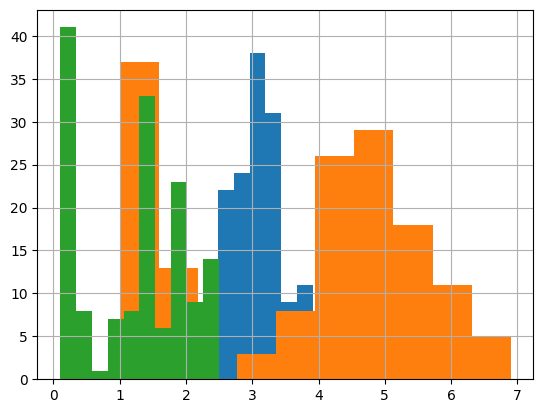

In [9]:
iris_data['sepal_width'].hist()
iris_data['petal_length'].hist()
iris_data['petal_width'].hist()

In [10]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

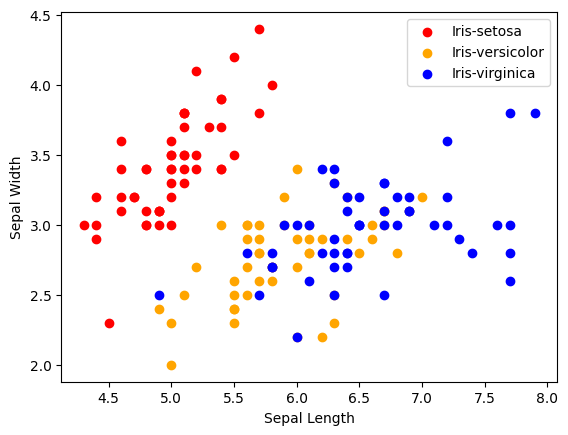

In [12]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

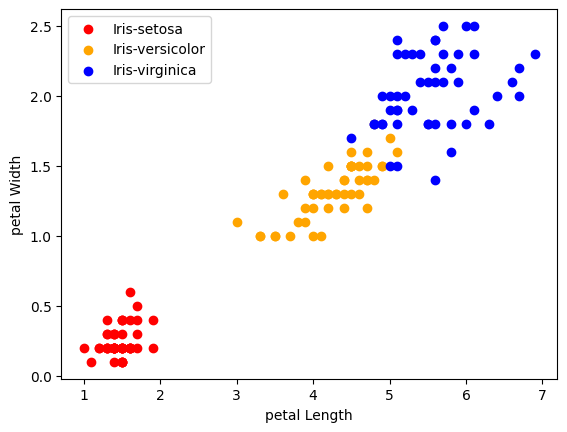

In [13]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
  plt.xlabel("petal Length")
  plt.ylabel("petal Width")
  plt.legend()

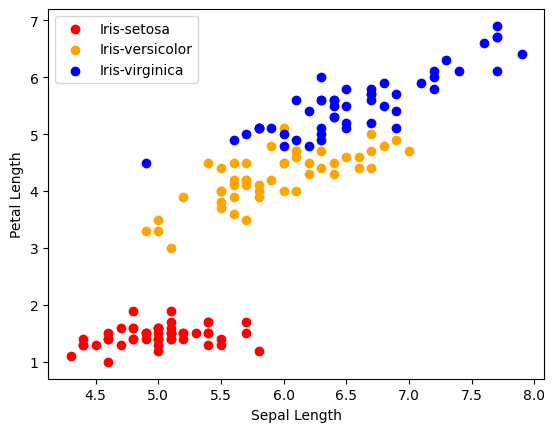

In [15]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

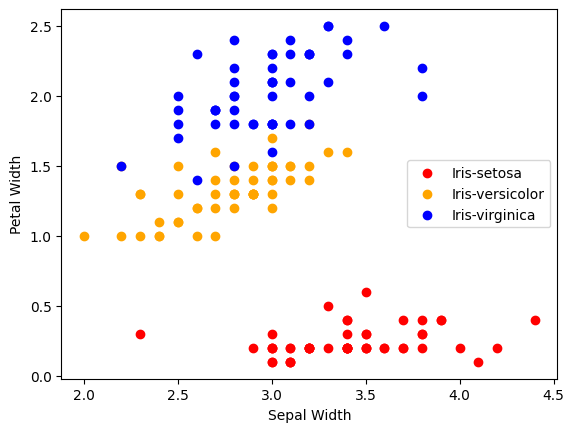

In [16]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

**Coorelation Matrix**

In [18]:

iris_data_numeric = iris_data.drop('species', axis=1)
iris_data_numeric.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

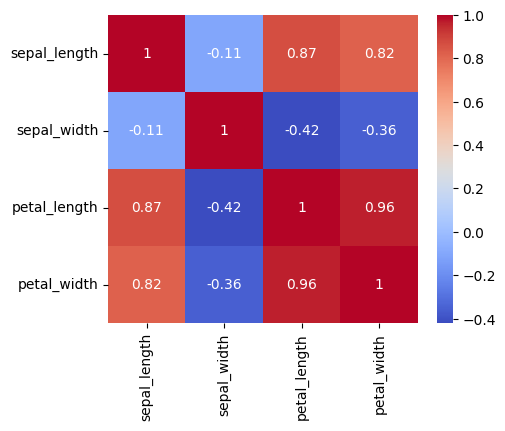

In [23]:
corr = iris_data.drop('species', axis=1).corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**Label Encoder**

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [27]:
from sklearn.model_selection import train_test_split
x = iris_data.drop(columns=['species'])
y = iris_data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9777777777777777


In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [32]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
print("Accuracy:",model.score(x_test, y_test))

Accuracy: 0.9777777777777777


In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [35]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
print("Accuracy:",model.score(x_test, y_test))

Accuracy: 0.9555555555555556
